# PCA

**Goal:** Explain the PCA method with pictures !!

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy

In [7]:
from scipy import stats
import scipy

**Goal:** Motivating example in 2d with first principle component

In [8]:
np.cos(np.pi/2)

6.123233995736766e-17

In [9]:
N_tr = 100

X = np.random.randn(N_tr,2)

# Make the first component 5x as important
std = np.array([5,1])
X *= std

# Rotate the vector
theta = np.pi/6
Q = np.array([
    [np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]
])

X = np.matmul(X,Q)

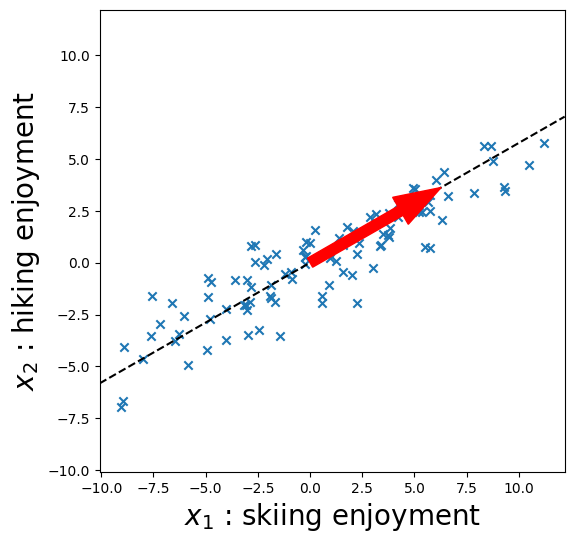

In [16]:
plt.figure(figsize=(6,6))

plt.scatter(*X.T,marker='x')

plt.xlabel('$x_1$ : skiing enjoyment',fontsize=20)
plt.ylabel('$x_2$ : hiking enjoyment',fontsize=20)

xmin,xmax = plt.xlim()
ymin,ymax = plt.ylim()

lims = ( min(xmin,ymin) , max(xmax,ymax) )

plt.xlim(lims)
plt.ylim(lims)

# plt.savefig('figures/PCA/ex2d.pdf',bbox_inches='tight')

xx = np.linspace(xmin, xmax)
yy = np.sin(theta) / np.cos(theta) * xx

plt.plot(xx,yy,'k--')

plt.arrow(0,0,std[0]*np.cos(theta),std[0]*np.sin(theta),
          width=0.5,
          color='red',zorder=2)

# plt.savefig('figures/PCA/ex2d_arrow.pdf',bbox_inches='tight')

plt.show()

In [13]:
Q.T

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [7]:
# u,V  = np.linalg.eig(Q)

In [8]:
# v_para = Q[:,0]
v = Q.T[:,0].reshape(-1,1) # and have it be a column vector

In [9]:
v

array([[0.8660254],
       [0.5      ]])

In [10]:
xi = X[0].reshape(-1,1)

In [14]:
np.matmul(v,np.matmul(v.T,xi))

array([[-1.44951897],
       [-0.83688017]])

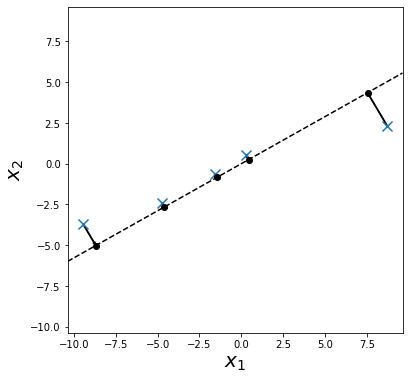

In [15]:
N_ex = 5

plt.figure(figsize=(6,6))

plt.scatter(*X[:N_ex].T,marker='x',s=100,zorder=5)

plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)

xmin,xmax = plt.xlim()
ymin,ymax = plt.ylim()

lims = ( min(xmin,ymin) , max(xmax,ymax) )

plt.xlim(lims)
plt.ylim(lims)

plt.savefig(f'figures/PCA/mini_{N_ex}tr_a.pdf',bbox_inches='tight')

xx = np.linspace(xmin, xmax)
yy = np.sin(theta) / np.cos(theta) * xx

plt.plot(xx,yy,'k--')

z = []

for i in range(N_ex):
    
    xi = X[i].reshape(-1,1) 
    zi = np.matmul(v.T,xi)
    yi = np.matmul(v,zi)
    
    z.append(zi)
    
    plt.scatter([yi[0]],[yi[1]],36,marker='o',color='k',zorder=5)
    
    plt.arrow(*xi.squeeze().T,*(yi-xi).squeeze().T,
              width=0.05,length_includes_head=True, color='k',zorder=0)

z = np.array(z)
    
plt.savefig(f'figures/PCA/mini_{N_ex}tr_b.pdf',bbox_inches='tight')

plt.show()

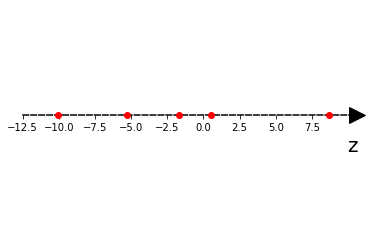

In [16]:
plt.scatter(z,np.zeros_like(z),color='r',zorder=5)

# plt.plot([xlim[0],xlim[1]+2],[0,0],'k--',zorder=0)

ax = plt.gca()
for loc in ['left','right','top']:
    ax.spines[loc].set_visible(False)

ax.spines['bottom'].set_position(('data', 0))
# ax.spines['bottom'].set_capstyle('butt')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_linestyle('dashed')

ax.set_yticks([])

xmin,xmax = plt.xlim()
ax.set_xlim(xmin,xmax+1)

ax.set_xticks(ax.get_xticks()[:-2])
# ax.set_xticklabels(ax.get_xticklabels()[:-1])

ax.plot((xmax+1), (0), ls="", marker=">", 
    ms=16, color="k", clip_on=False)

plt.xlabel('z',fontsize=20,loc='right')
plt.savefig(f'figures/PCA/mini_{N_ex}tr_c.pdf',bbox_inches='tight')


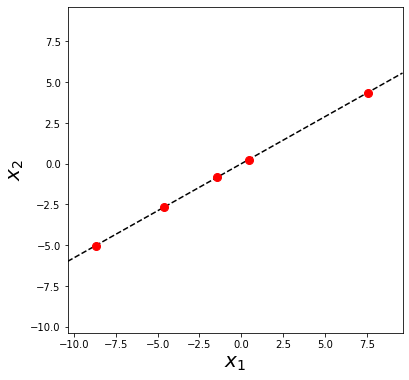

In [17]:
plt.figure(figsize=(6,6))

# plt.scatter(*X[:N_ex].T,marker='x',s=100,zorder=5)

plt.plot(xx,yy,'k--')

for i in range(N_ex):
    
    xi = X[i].reshape(-1,1) 
    zi = np.matmul(v.T,xi)
    yi = np.matmul(v,zi)

    plt.scatter([yi[0]],[yi[1]],64,marker='o',color='r',zorder=5)
    
    # plt.arrow(*xi.squeeze().T,*(yi-xi).squeeze().T,
    #           width=0.05,length_includes_head=True, color='k',zorder=0)

plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)

plt.xlim(lims)
plt.ylim(lims)

plt.savefig(f'figures/PCA/mini_{N_ex}tr_d.pdf',bbox_inches='tight')

plt.show()